# Titanic

¿Sobreviviria tu pasajero?

**librerias**

In [1]:
import warnings
warnings.simplefilter('ignore')

In [113]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as DecTree
from sklearn.neighbors import KNeighborsClassifier 

**datos**

Incluyen caracteristicas como edad, numero de ticket, cabina, etc..

El objetivo es clasificar-predecir la supervivencia.

In [20]:
df=pd.read_csv('https://raw.githubusercontent.com/Alveuz/RandomDataSets/master/Titanic/TitanicTrain.csv')

df.head()

,age,fare,embarked,cabin,pclass,sex,sibsp,parch,ticket,survival
0,25.0,7.9250,S,missing,3,male,0,0,STON/O 2. 3101291,0
1,41.0,134.5000,C,E40,1,female,0,0,16966,1
2,28.0,7.7333,Q,missing,3,male,0,0,334912,0
3,18.0,7.7750,S,missing,3,female,0,0,347087,0
4,29.0,21.0000,S,missing,2,male,1,0,11668,0


**exploracion**

In [21]:
df.shape

(1047, 10)

In [22]:
df.columns

Index(['age', 'fare', 'embarked', 'cabin', 'pclass', 'sex', 'sibsp', 'parch',
       'ticket', 'survival'],
      dtype='object')

In [23]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1047 non-null   float64
 1   fare      1047 non-null   float64
 2   embarked  1047 non-null   object 
 3   cabin     1047 non-null   object 
 4   pclass    1047 non-null   int64  
 5   sex       1047 non-null   object 
 6   sibsp     1047 non-null   int64  
 7   parch     1047 non-null   int64  
 8   ticket    1047 non-null   object 
 9   survival  1047 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 301.5 KB


In [24]:
df.isna().sum()

age         0
fare        0
embarked    0
cabin       0
pclass      0
sex         0
sibsp       0
parch       0
ticket      0
survival    0
dtype: int64

In [25]:
df.describe()

,age,fare,pclass,sibsp,parch,survival
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,29.648122,33.726333,2.297039,0.524355,0.384909,0.382044
std,12.562991,51.138225,0.841457,1.095414,0.845572,0.486119
min,0.166700,0.000000,1.000000,0.000000,0.000000,0.000000
25%,23.000000,7.895800,2.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,3.000000,0.000000,0.000000,0.000000
75%,35.000000,31.387500,3.000000,1.000000,0.000000,1.000000
max,74.000000,512.329200,3.000000,8.000000,9.000000,1.000000


**preparando datos**

In [26]:
# se crea el campo de si es mujer
df['isfemale']=np.where(df.sex=='female', 1, 0)

In [135]:
# se crea el campo de si es mujer
df['surv']=np.where(df.survival==1, "vivo", "muerto")

In [136]:
df.head()

,age,fare,embarked,cabin,pclass,sibsp,parch,survival,isfemale,surv
0,25.0,7.9250,S,missing,Third,0,0,0,0,muerto
1,41.0,134.5000,C,E40,First,0,0,1,1,vivo
2,28.0,7.7333,Q,missing,Third,0,0,0,0,muerto
3,18.0,7.7750,S,missing,Third,0,0,0,1,muerto
4,29.0,21.0000,S,missing,Second,1,0,0,0,muerto


In [29]:
df['embarked'].unique()

array(['S', 'C', 'Q', 'missing'], dtype=object)

In [31]:
# se eliminan columnas innecesarias
df=df.drop(columns=['sex','ticket'])

# pclass a categorico string
df.pclass=np.where(df.pclass== 1,'First', 
                   np.where(df.pclass==2, 
                            'Second', 'Third'))


In [32]:
df.head()

,age,fare,embarked,cabin,pclass,sibsp,parch,survival,isfemale
0,25.0,7.9250,S,missing,Third,0,0,0,0
1,41.0,134.5000,C,E40,First,0,0,1,1
2,28.0,7.7333,Q,missing,Third,0,0,0,0
3,18.0,7.7750,S,missing,Third,0,0,0,1
4,29.0,21.0000,S,missing,Second,1,0,0,0


In [33]:
# one-hot encoding de las variables categoricas

def one_hot(df, columns, drop_first=True): 
    dummy=pd.get_dummies(df, 
                         columns=columns, 
                         drop_first=drop_first)
    return dummy

In [35]:
df_dummy=one_hot(df, columns=['pclass', 'cabin', 'embarked'])
df_dummy=df_dummy.dropna()
df_dummy.head()

,age,fare,sibsp,parch,survival,isfemale,pclass_Second,pclass_Third,cabin_A11,cabin_A14,...,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T,cabin_missing,embarked_Q,embarked_S,embarked_missing
0,25.0,7.9250,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,41.0,134.5000,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28.0,7.7333,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,18.0,7.7750,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,29.0,21.0000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


## Modelo

In [120]:
# train-test split

X=df_dummy.drop('survival', axis=1)
y=df_dummy.survival


X_train, X_test, y_train, y_test=tts(X, y, test_size=.2, random_state=42)

In [110]:
#regresión lineal
logreg=LogReg()

logreg.fit(X_train, y_train.values);

In [111]:
y_pred=logreg.predict(X_test)


print('Accuracy : {:.2f}%'.format(logreg.score(X_test, y_test)*100))

Accuracy : 82.38%


In [103]:
#árbol de desición  
dectree = DecTree(criterion='entropy',
                               max_depth=50,
                               min_samples_split = 10, 
                               random_state=0)
dectree.fit(X_train, y_train.values)

DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_split=10,
                       random_state=0)

In [104]:
y_pred_tree=dectree.predict(X_test)


print('Accuracy : {:.2f}%'.format(dectree.score(X_test, y_test)*100))

Accuracy : 80.00%


In [148]:
pip install graphviz 


Note: you may need to restart the kernel to use updated packages.


In [152]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 

# Defining and fitting a DecisionTreeClassifier instance
tree = DecTree(max_depth = 2)
tree.fit(X,y)

# Visualize Decision Tree
from sklearn.tree import export_graphviz

# Creates dot file named tree.dot
arbol = tree.export_graphviz(
            feature_names = list(X.columns),
            class_names = df.surv,
            filled = True,
            rounded = True)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'export_graphviz'

In [150]:
graph = graphviz.Source(arbol) 

Minimum error:- 0.2571428571428571 at K = 4


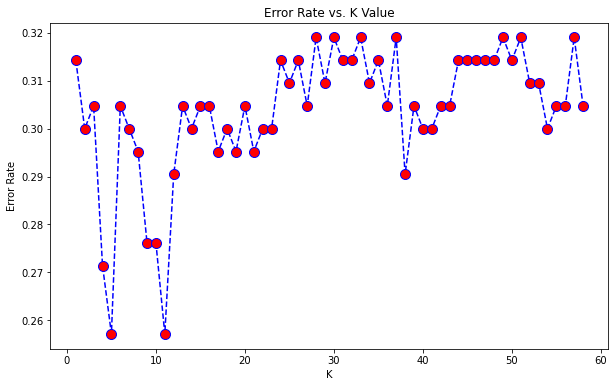

In [119]:
#knn
error_rate = []
for i in range(1,59):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,59),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [126]:
#inicializando el modelo
model = KNeighborsClassifier(n_neighbors=11)

#entrenando modelo
model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=11)

In [127]:
y_pred_knn=model.predict(X_test)


print('Accuracy : {:.2f}%'.format(dectree.score(X_test, y_test)*100))

Accuracy : 80.00%


In [99]:
#yhat
yhat_logreg = logreg.predict(X_test)

In [100]:
yhat_logreg


array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [41]:
# interpretacion de los coeficientes de logreg
print ('Coeficientes:')

logreg.coef_

Coeficientes:


array([[-4.14771449e-02,  6.99675199e-04, -3.64792426e-01,
        -7.58069606e-02,  2.45152315e+00, -1.92557512e-01,
        -1.23502746e+00,  0.00000000e+00, -2.36729716e-01,
         9.12270360e-02, -2.42486714e-01, -2.27086881e-01,
         3.48311239e-01, -1.86395458e-01, -2.26067129e-01,
         3.34901375e-01, -4.83570831e-01,  3.36260880e-01,
         0.00000000e+00, -1.44771765e-01,  2.92233736e-01,
         0.00000000e+00,  3.00486134e-01,  1.18537684e-01,
        -2.17728398e-01,  6.35986852e-02, -1.30685527e-01,
         3.38942289e-01, -9.55957957e-03, -2.69596037e-01,
         1.76096096e-01,  1.23018868e-01,  5.57914667e-02,
         0.00000000e+00,  7.50466414e-02,  3.98817259e-02,
        -1.80489725e-01,  0.00000000e+00,  6.54391921e-02,
         0.00000000e+00,  5.39752500e-02,  3.65328022e-01,
         2.55890726e-01,  6.49731004e-02,  2.57010712e-01,
         3.03258593e-02,  0.00000000e+00,  9.34702545e-02,
        -2.82631051e-01,  2.63029584e-02,  1.22881671e-0

In [42]:
coefs=pd.DataFrame({'Carac':X.columns, 'Coef':logreg.coef_[0]})
print('Caracteristicas positivas:')
coefs.sort_values('Coef', ascending=False).head(7)

Caracteristicas positivas:


,Carac,Coef
4,isfemale,2.451523
58,cabin_B96 B98,0.666682
120,cabin_D35,0.476846
112,cabin_D19,0.472901
69,cabin_C126,0.463343
166,cabin_F4,0.435750
64,cabin_C116,0.433704


In [43]:
print('Caracteristicas negativas:')
coefs.sort_values('Coef', ascending=False).tail(7)

Caracteristicas negativas:


,Carac,Coef
89,cabin_C6,-0.485793
167,cabin_G6,-0.539399
88,cabin_C55 C57,-0.542481
171,embarked_S,-0.722519
169,cabin_missing,-0.803834
75,cabin_C22 C26,-1.117795
6,pclass_Third,-1.235027


## Prediccion a 'mano'

In [46]:
# se crea un pasajero ficticio


pasajero={
    'pclass':'Third', # First, Second, Third (Clase)
    'isfemale':1,     # 0-1  (Genero)
    'age':20,         # 0-100 (Edad)
    'sibsp':3,        # (0-8) (Hermanos, esposos)
    'parch':0,        # (0-9)  (Padres, hijos)
    'fare':200,       # (0-500) (Tarifa)
    'cabin':'A',      # 'A', 'C', 'B', 'E', 'D', 'G', 'F', 'T', 'Z'  (Cabina)
    'embarked':'Q',   # 'Q', 'S', 'C' # Queenstown Southampton Cherbourg (Puerto)
    'survival':0      # para concatenar dfs
}
 

In [47]:
pas_df=pd.DataFrame.from_dict(pasajero, orient='index').T
pas_df

,pclass,isfemale,age,sibsp,parch,fare,cabin,embarked,survival
0,Third,1,20,3,0,200,A,Q,0


In [48]:
df.head()

,age,fare,embarked,cabin,pclass,sibsp,parch,survival,isfemale
0,25.0,7.9250,S,missing,Third,0,0,0,0
1,41.0,134.5000,C,E40,First,0,0,1,1
2,28.0,7.7333,Q,missing,Third,0,0,0,0
3,18.0,7.7750,S,missing,Third,0,0,0,1
4,29.0,21.0000,S,missing,Second,1,0,0,0


In [49]:
pred_df=pd.concat([pas_df, df], ignore_index=True)
pred_df.head()

,pclass,isfemale,age,sibsp,parch,fare,cabin,embarked,survival
0,Third,1,20,3,0,200,A,Q,0
1,Third,0,25.0,0,0,7.925,missing,S,0
2,First,1,41.0,0,0,134.5,E40,C,1
3,Third,0,28.0,0,0,7.7333,missing,Q,0
4,Third,1,18.0,0,0,7.775,missing,S,0


In [51]:
pred_df=one_hot(pred_df,
               columns=['pclass', 'cabin', 'embarked'])
pred_df.head()

,isfemale,age,sibsp,parch,fare,survival,pclass_Second,pclass_Third,cabin_A10,cabin_A11,...,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T,cabin_missing,embarked_Q,embarked_S,embarked_missing
0,1,20,3,0,200,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,25.0,0,0,7.925,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,41.0,0,0,134.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,28.0,0,0,7.7333,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,18.0,0,0,7.775,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [92]:
# prediccion log reg

x=pred_df[X.columns].head(1) # datos del pasajero

y_pred=logreg.predict(x)

y_prob=logreg.predict_proba(x)

print ('Etiqueta:', y_pred) 
print ()
print ('Probabilidad [0 , 1]:', y_prob[0])
print ()
print ('Prob supervivencia:', y_prob[0][1])

Etiqueta: [1]

Probabilidad [0 , 1]: [0.28335989 0.71664011]

Prob supervivencia: 0.7166401115007709


In [105]:
# prediccion dec tree

x=pred_df[X.columns].head(1) # datos del pasajero

y_pred=dectree.predict(x)

y_prob=dectree.predict_proba(x)

print ('Etiqueta:', y_pred) 
print ()
print ('Probabilidad [0 , 1]:', y_prob[0])
print ()
print ('Prob supervivencia:', y_prob[0][1])

Etiqueta: [0]

Probabilidad [0 , 1]: [1. 0.]

Prob supervivencia: 0.0


In [128]:
# prediccion knn

x=pred_df[X.columns].head(1) # datos del pasajero

y_pred=model.predict(x)

y_prob=model.predict_proba(x)

print ('Etiqueta:', y_pred) 
print ()
print ('Probabilidad [0 , 1]:', y_prob[0])
print ()
print ('Prob supervivencia:', y_prob[0][1])

Etiqueta: [1]

Probabilidad [0 , 1]: [0.36363636 0.63636364]

Prob supervivencia: 0.6363636363636364


## Plot

In [130]:
tasa_media_super=np.mean(df.survival)*100
print ('Tasa media supervivencia: {:.2f}%'.format(tasa_media_super))

Tasa media supervivencia: 38.20%


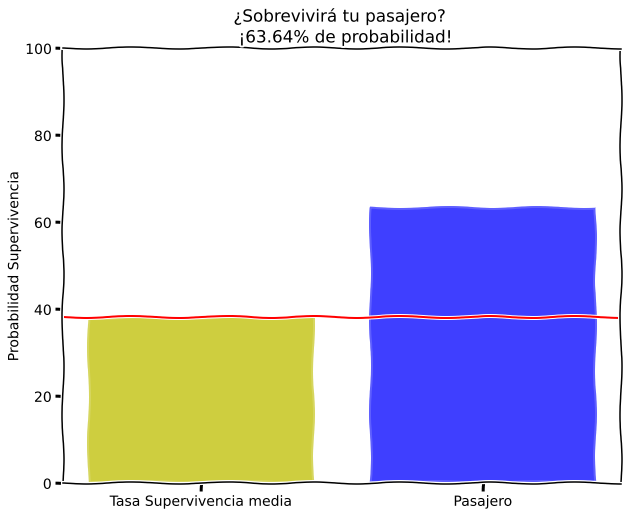

In [129]:
#log reg
with plt.xkcd():
    plt.figure(figsize=(10,8))

    plt.bar(range(2),
            [tasa_media_super, y_prob[0][1]*100],
            align='center', 
            color=['y', 'b'], 
            alpha=0.5)

    plt.xticks(range(2), ['Tasa Supervivencia media', 'Pasajero'])

    plt.axhline(tasa_media_super, color='r')
    plt.ylim([0,100])
    plt.ylabel('Probabilidad Supervivencia')
    plt.title('¿Sobrevivirá tu pasajero? \n '+'¡{:.2f}% de probabilidad!'.format(y_prob[0][1]*100))

    plt.show();

In [ ]:
#dec tree
with plt.xkcd():
    plt.figure(figsize=(10,8))

    plt.bar(range(2),
            [tasa_media_super, y_prob[0][1]*100],
            align='center', 
            color=['y', 'b'], 
            alpha=0.5)

    plt.xticks(range(2), ['Tasa Supervivencia media', 'Pasajero'])

    plt.axhline(tasa_media_super, color='r')
    plt.ylim([0,100])
    plt.ylabel('Probabilidad Supervivencia')
    plt.title('¿Sobrevivirá tu pasajero? \n '+'¡{:.2f}% de probabilidad!'.format(y_prob[0][1]*100))

    plt.show();

# Preparando Data para Produccion


In [30]:
def data():
    
    df=pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv')
    
    df.cabin=df.cabin.replace(np.NaN, 'U') 
    df.cabin=[e[0] for e in df.cabin.values]
    df.cabin=df.cabin.replace('U', 'Unknown')
    
    df['title']=[e.split()[1] for e in df.name.values]
    df.title=[t if t in ['Mr.', 'Miss.', 
                         'Mrs.', 'Master.', 
                         'Dr.', 'Rev.'] else 'Unknown'
              for t in df.title.values ]
    
    df['isfemale']=np.where(df.sex=='female', 1, 0)
    
    df=df.drop(columns=['sex', 'name', 'boat', 'body', 'ticket', 'home.dest'])


    df.pclass=np.where(df.pclass== 1,'First', 
                       np.where(df.pclass==2, 
                                'Second', 'Third'))

    df.embarked=df.embarked.replace(np.NaN, 'Unknown')
    
    df_dummy=pd.get_dummies(df, 
                            columns=['pclass', 'cabin', 
                                     'embarked', 'title'], 
                            drop_first=True)
    
    df_dummy=df_dummy.dropna()
    
    df_dummy.to_csv('data/titanic.csv', header=False, index=False)

    
    
    
data()  # se guarda el df sin nombres de columnas ni indice

# Web-App (main.py)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Apr/2020 21:27:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Apr/2020 21:27:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Apr/2020 21:27:54] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [10/Apr/2020 21:27:54] "GET / HTTP/1.1" 200 -


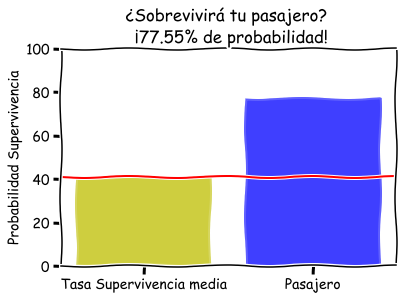

In [34]:
from flask import Flask
from flask import render_template
from flask import request
from flask import Markup

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import io
import os
import base64

import numpy as np
from numpy import genfromtxt
from sklearn.linear_model import LogisticRegression as LogReg

 
# necesario en pythonanywhere
#PATH=os.path.dirname(os.path.abspath(__file__))
    
# default inicial
EMBARKED='Southampton'
FARE=33
AGE=30
GENDER='Female'
TITLE='Mrs.'
CLASS='Second'
CABIN='C'
SIBSP=0
PARCH=0


# inicializando variables
tasa_media=0



# modelo 
logreg=LogReg()



# flask app
app=Flask(__name__)



# antes del primer request...
@app.before_first_request
def startup():
    global tasa_media, logreg
    
    #data=genfromtxt(PATH+'/data/titanic.csv', delimiter=',') # fuera de jupyter
    data=genfromtxt('data/titanic.csv', delimiter=',')
    
    tasa_media=(np.mean([e[0] for e in data])*100)

    X=[e[1:] for e in data]
    y=[e[0] for e in data]
    
    logreg.fit(X, y)  # se entrena una vez antes de arrancar
    
    

    
# main app
@app.route("/", methods=['POST', 'GET'])
def main():
    
    if request.method=='POST':
        s_embarked=request.form['s_embarked']
        s_fare=request.form['s_fare']
        s_age=request.form['s_age']
        s_gender=request.form['s_gender']
        s_title=request.form['s_title']
        s_class=request.form['s_class']
        s_cabin=request.form['s_cabin']
        s_sibsp=request.form['s_sibsp']
        s_parch=request.form['s_parch']
        
        # se reasigna para prediccion
        age=int(s_age)
        isfemale=1 if s_gender=='Female' else 0
        sibsp=int(s_sibsp)
        parch=int(s_parch)
        fare=int(s_fare)
        
        
        # puerto de embarque
        embarked_Q=0
        embarked_S=0
        embarked_Unknown=0 
        if (s_embarked[0]=='Q'):
            embarked_Q = 1
        if (s_embarked[0]=='S'):
            embarked_S = 1
            
        
        # clase
        pclass_Second=0
        pclass_Third=0
        if (s_class=='Second'):
            pclass_Second=1
        if (s_class=='Third'):
            pclass_Third=1
            
            
        
        # titulo
        title_Master=0
        title_Miss=0
        title_Mr=0
        title_Mrs=0
        title_Rev=0
        title_Unknown=0
        if (s_title=='Master.'):
            title_Master=1
        if (s_title=='Miss.'):
            title_Miss=1
        if (s_title=='Mr.'):
            title_Mr=1
        if (s_title=='Mrs.'):
            title_Mrs=1
        if (s_title=='Rev.'):
            title_Master=1
        if (s_title=='Unknown'):
            title_Unknown=1
            
            
        # cabina
        cabin_B=0
        cabin_C=0  
        cabin_D=0  
        cabin_E=0
        cabin_F=0
        cabin_G=0
        cabin_T=0
        cabin_Unknown=0
        if (s_cabin=='B'):
            cabin_B=1
        if (s_cabin=='C'):
            cabin_C=1
        if (s_cabin=='D'):
            cabin_D=1
        if (s_cabin=='E'):
            cabin_E=1
        if (s_cabin=='F'):
            cabin_F=1
        if (s_cabin=='G'):
            cabin_G=1
        if (s_cabin=='T'):
            cabin_T=1
        if (s_cabin=='Unknown'):
            cabin_Unknown=1
            
            
        
        # pasajero
        pasajero=[[age, sibsp, parch, fare, isfemale, 
                   pclass_Second, pclass_Third,  
                   cabin_B, cabin_C, cabin_D, cabin_E, cabin_F, cabin_G,
                   cabin_T, cabin_Unknown, embarked_Q, 
                   embarked_S, embarked_Unknown,  
                   title_Master, title_Miss, title_Mr, title_Mrs, 
                   title_Rev, title_Unknown]]
        
        
        # prediccion
        y_prob=logreg.predict_proba(pasajero)
        
        
        # plot
        with plt.xkcd():
            plt.figure()
            plt.bar(range(2),[tasa_media, y_prob[0][1]*100],
                    align='center', color=['y', 'b'], alpha=0.5)
            
            plt.xticks(range(2), ['Tasa Supervivencia media', 'Pasajero'])
            plt.axhline(tasa_media, color='r')
            plt.ylim([0,100])
            plt.ylabel('Probabilidad Supervivencia')
            plt.title('¿Sobrevivirá tu pasajero? \n '+'¡{:.2f}% de probabilidad!'.format(y_prob[0][1]*100))
            img=io.BytesIO()
            plt.savefig(img, format='png')
            img.seek(0)
            plot_url=base64.b64encode(img.getvalue()).decode()
            
        
        return render_template('index.html',
            model_results='',
            model_plot=Markup('<img src="data:image/png;base64,{}">'.format(plot_url)),
            s_embarked=s_embarked,
            s_fare=s_fare,
            s_age=s_age,
            s_gender=s_gender,
            s_title=s_title,
            s_class=s_class,
            s_cabin=s_cabin,
            s_sibsp=s_sibsp,
            s_parch=s_parch)
    
    else:
        # parametros por defecto
        return render_template('index.html',
            model_results = '',
            model_plot = '',
            s_embarked=EMBARKED,
            s_fare=FARE,
            s_age=AGE,
            s_gender=GENDER,
            s_title=TITLE,
            s_class=CLASS,
            s_cabin=CABIN,
            s_sibsp=SIBSP,
            s_parch=PARCH)
    
    

# solo en local
if __name__=='__main__':
    app.run(debug=False)
    

## Codigo HTML